<a href="https://colab.research.google.com/github/jorgevillegazz/Challange-Telecom-X/blob/main/TelecomX_LATAM_de_George.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#💡Acerca del desafío 💡

Descripción

# ***Telecom X - Análisis de Evasión de Clientes***

Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto "Churn de Clientes". **La empresa** enfrenta una alta tasa de cancelaciones y **necesita comprender los factores que llevan a la pérdida de clientes.**

Tu desafío será **recopilar, procesar y analizar los dato**s, utilizando Python y sus principales bibliotecas **para extraer información valiosa**. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

#### Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente

#📌 Extracción

##Cargando Librerias

In [100]:
# Importamos las librerías
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

##Importando Datos

In [101]:
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
df_telecom = pd.read_json(url)

# Visualizando los Datos

In [102]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [103]:
df_telecom

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


# El archivo **json**  que proporciona la **Empresa** tiene cuatro columnas directorio la cuales  se tiene  que proceceder a **normalizar** (customer, phone, internet y account)

***


**Primero SEPARAMOS las columnas ID y Churn**  de las demas columnas que tienen diccionario

In [104]:
# Extraer columnas customerID	Churn
df_customerID_Churn = df_telecom[['customerID', 'Churn']]

Extraemos las 4 columnas diccionario  para proceder a **normalizar**

In [105]:
# Extraer columnas que  tienen directorio y normalizarlos
df_customer = pd.json_normalize(df_telecom['customer'])
df_phone = pd.json_normalize(df_telecom['phone'])
df_internet = pd.json_normalize(df_telecom['internet'])
df_account = pd.json_normalize(df_telecom['account'])

Juantamos todas las columnas  para crea un **nuevo df**

---



In [106]:
# Se concatena o juentan las columnas para crear el nuevo df  ya normalizado o sin direcotrios
df_normalizado = pd.concat([df_customerID_Churn, df_customer, df_phone, df_internet, df_account], axis=1)

#Obligamos a mostrar  TODAS la columnas con la siguinete lienea de  comando de pandas 'display.max_columns', None
pd.set_option('display.max_columns', None)

Es hora de ver como quedo nuestra  Nueva Data Frame  ya formalizada




In [107]:
# Obligamos a mostrar TODAS la columnas con la siguinete linea de comando de
# pandas 'display.max_columns', None
pd.set_option('display.max_columns', None)
df_normalizado

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [108]:
df_normalizado.sample(10)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
881,1240-KNSEZ,Yes,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.10,20.1
379,0541-FITGH,No,Female,0,Yes,No,2,Yes,No,DSL,Yes,No,No,No,No,Yes,Month-to-month,Yes,Mailed check,62.15,113.1
1996,2824-MYYBN,No,Female,0,Yes,Yes,37,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.25,3314.15
5874,8033-VCZGH,No,Male,0,Yes,No,50,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,One year,Yes,Electronic check,103.95,5231.3
786,1112-CUNAO,Yes,Female,1,No,No,15,Yes,Yes,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,No,Electronic check,89.85,1424.95
1811,2580-ATZSQ,No,Female,0,Yes,Yes,65,Yes,No,DSL,Yes,Yes,Yes,No,No,No,One year,No,Bank transfer (automatic),61.35,3874.1
4546,6230-BSUXY,Yes,Female,1,No,No,1,Yes,No,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,85.00,85
5397,7379-FNIUJ,No,Male,0,No,No,2,Yes,No,Fiber optic,Yes,Yes,No,No,Yes,Yes,Month-to-month,No,Electronic check,100.20,198.5
1241,1769-GRUIK,No,Female,0,No,No,18,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,71.10,1247.75
2099,2955-PSXOE,Yes,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),20.20,20.2


#🔧 Transformación

✅ Es Hora Explorar las columnas del dataset y verificar sus tipos de datos.

In [109]:
#visualizamos el tipo de dato por columna
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


Se Observa que nuestro Data Frame  contiene **7267 registros** con un total de **21 Columnas.**

**La mayoria son de tipo Object**,  con forme avanzemos veremos que variables cambiaremos su tipo.

Tambien se observa que hay 2 columnas que tienen un **punto "."**  en su nombre, los cuales serán remplazados por **"_" (guión bajo)**
***

In [110]:
# Limpiar nombres de columnas que tienen punto (Charges.Monthly y Charges.Total)
df_normalizado.columns = [col.replace('Charges.', 'Charges_')  for col in df_normalizado.columns]

# visualizar resultado
df_normalizado.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [111]:
#Verificacion del cambio de nombre en las columnas que tenian punto
columnas=list(df_normalizado.columns)
columnas
#df_normalizado.columns.tolist()

['customerID',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges_Monthly',
 'Charges_Total']

#**Conversion de Datos a Tipo Numérico**

De momento creo  que una de las columnas importantes **Charges_Total** la convertiremos de tipo objet a tipo float para nuestrofuturo  analisis exploratorio.

Mas adelante  veremos cuantos mas  cambiaremos

In [112]:
from numpy import astype


# df_telecom_norm['Charges.Total']=df_telecom_norm['Charges.Total'].astype('float64')
# la anterior linea me causaba error. tube que usar el siguiente codico con la funcion  pd.to_numeric con parametro, error='çoerce'
df_normalizado['Charges_Total'] =pd.to_numeric(df_normalizado['Charges_Total'], errors='coerce')



In [113]:
# Verificamos el nuevo tipos de datos
df_normalizado.dtypes[['Charges_Total']]


,0
Charges_Total,float64


#**Comprobación de incoherencias en los datos**
# **Busqueda de valores Nulos (Nan)**

In [114]:
# CREAMOS un ciclo for para detectar valores  faltantes (NaN)
for nombre in columnas:
    nulos=(df_normalizado[nombre].isna().sum())
    if nulos > 0:
      print(f"\033[1m{nombre}\033[0m",'.....',nulos)

Charges_Total ..... 11


Observamos  que Chargues_Total tiene 11 registros NaN

In [115]:
df_normalizado[df_normalizado['Charges_Total'].isna()]


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


# **Ahora  buscaremos  datos  que tengan valor datos vacios' '**

---




In [116]:
# CREAMOS un ciclo for para detectar datos vacios en cada  columna
for nombre in df_normalizado.columns:
    nulos=(df_normalizado[nombre]=='').sum()
    if nulos > 0:
      print(f"\033[1m{nombre}\033[0m",'.....',nulos)

Churn ..... 224


# **Interesante saber que Churn cuenta  con 224 registros vacios los cuales en breve los eliminaremos de nuestro Data Frame**
***

# **Verificamos cuantos Clientes nuevos hay ( cero meses)**

In [117]:
df_normalizado.tenure.value_counts()

,count
tenure,
1,634
72,369
2,246
3,207
4,185
...,...
28,60
39,59
44,54


In [118]:
# REVISAMOS cuantos registros de clientes han cancelado y cuantos siguen activos
df_normalizado.Churn.value_counts()

,count
Churn,
No,5174
Yes,1869
,224


#**Manejo de inconsistencias**
# **Reemplazo de Valores nulos (Nan)**

In [119]:
# Reemplazar valores nulos en Charges_Total con 0
# Los clientes con tenure(meses de contrato) = 0 consideré que aún no han generado cobros

df_normalizado['Charges_Total'] = df_normalizado['Charges_Total'].fillna(0)

Revisamos el cambio

In [120]:
df_normalizado.Charges_Total.isna().sum()

np.int64(0)

In [121]:
#Comprobando los cambios
df_normalizado[['Charges_Monthly', 'Charges_Total']].isna().sum()


,0
Charges_Monthly,0
Charges_Total,0


# **Estandarización y transformación de datos**

 La estandarización y transformación de datos es una etapa opcional, pero altamente recomendada, ya que busca hacer que la información sea más consistente, comprensible y adecuada para el análisis.

 Durante esta fase, por ejemplo, puedes **convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0)**

In [122]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [123]:
df_normalizado['Churn']=df_normalizado['Churn'].replace({'Yes':1, 'No':0})


In [124]:
# REVISAMOS nuevamente que los registros Yes y No hayan sido cambiados por 0 y 1
df_normalizado.Churn.value_counts()

,count
Churn,
0,5174
1,1869
,224


In [125]:
#Limpieza de columna 'Churn'

import numpy as np

# Reemplazar string vacío por NaN
df_normalizado['Churn'] = df_normalizado['Churn'].replace('', np.nan)

/tmp/ipython-input-3373769560.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_normalizado['Churn'] = df_normalizado['Churn'].replace('', np.nan)


In [126]:
# Mostrar cuántos valores nulos hay en Churn
print("Valores NaN en 'Churn':", df_normalizado['Churn'].isna().sum())


Valores NaN en 'Churn': 224


In [127]:
# Eliminar filas donde Churn es NaN (ya que no sabemos si el cliente se fue o no)
df_normalizado= df_normalizado.dropna(subset=['Churn'])  #La función df = df.dropna(subset=[' ']) elimina las filas que contienen valores nulos (\(NaN\) o \(None\))


In [131]:
#Checamos que se hayan eliminado los valores NaN de la columna Churn
print("Valores NaN en 'Churn':", df_normalizado['Churn'].isna().sum())

Valores NaN en 'Churn': 0


In [128]:
# Convertir a tipo entero (si aún no está)
df_normalizado['Churn'] = df_normalizado['Churn'].astype(int)


/tmp/ipython-input-558099713.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normalizado['Churn'] = df_normalizado['Churn'].astype(int)


In [132]:
#REVISAMOS EL TIPO DE Datos de Churn
df_normalizado.Churn.dtypes

dtype('int64')

In [129]:
# Nuevamente REVISAMOS que los registros de clientes han cancelado y cuantos siguen activos
df_normalizado.Churn.value_counts()

,count
Churn,
0,5174
1,1869


In [133]:
df_normalizado

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,0002-ORFBO,0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,0,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,1,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,1,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,1,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,1,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,0,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,0,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [135]:
df_normalizado['Cuentas_Diarias']=(df_normalizado['Charges_Monthly']/30).round(2)
df_normalizado['Cuentas_Diarias']=df_normalizado['Cuentas_Diarias'].astype(float)
df_normalizado

/tmp/ipython-input-3199839320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normalizado['Cuentas_Diarias']=(df_normalizado['Charges_Monthly']/30).round(2)
/tmp/ipython-input-3199839320.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normalizado['Cuentas_Diarias']=df_normalizado['Cuentas_Diarias'].astype(float)


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.19
1,0003-MKNFE,0,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,2.00
2,0004-TLHLJ,1,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,1,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,1,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.84
7263,9992-RRAMN,1,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.84
7264,9992-UJOEL,0,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,0,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.26


# **Llama la atención que en la columnas MultipleLines  en la fila 7266 existe un valor llamado  No phone service en lugar  de No**
# Tenemos que buscar  cuantos registros y tipo de valores  existen para unificar  todso los valores  a Yes y No

In [136]:
df_normalizado.MultipleLines.value_counts()

,count
MultipleLines,
No,3390
Yes,2971
No phone service,682


In [140]:
df_normalizado.PhoneService.value_counts()

,count
PhoneService,
Yes,6361
No,682


In [142]:
df_normalizado.OnlineSecurity.value_counts()

,count
OnlineSecurity,
No,3498
Yes,2019
No internet service,1526


In [144]:
# CREAMOS un ciclo for para detectar datos con valor "No internet service" en
# cada columna
for nombre in df_normalizado.columns:
    No_int_ser=(df_normalizado[nombre]=='No internet service').sum()
    if No_int_ser > 0:
      print(f"\033[1m{nombre}\033[0m",'.....',No_int_ser)

OnlineSecurity ..... 1526
OnlineBackup ..... 1526
DeviceProtection ..... 1526
TechSupport ..... 1526
StreamingTV ..... 1526
StreamingMovies ..... 1526


In [145]:
# CREAMOS un ciclo for para detectar datos con valor "No phone service " en
# cada columna
for nombre in df_normalizado.columns:
    No_phone_ser=(df_normalizado[nombre]=='No phone service').sum()
    if No_phone_ser > 0:
      print(f"\033[1m{nombre}\033[0m",'.....',No_phone_ser)

MultipleLines ..... 682


#**Reemplazo de categorías redundantes**

In [149]:
# Objetivo: unificar 'No internet service' y 'No phone service' como 'No'

# Lista de columnas relacionadas a internet donde aparece "No internet service"
internet_related_cols = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Reemplazar "No internet service" por "No"
for nom_col in internet_related_cols:
    df_normalizado[nom_col] = df_normalizado[nom_col].replace('No internet service', 'No')

# Reemplazar "No phone service" en la columna MultipleLines
df_normalizado['MultipleLines'] = df_normalizado['MultipleLines'].replace('No phone service', 'No')

/tmp/ipython-input-431445884.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normalizado[nom_col] = df_normalizado[nom_col].replace('No internet service', 'No')
/tmp/ipython-input-431445884.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normalizado['MultipleLines'] = df_normalizado['MultipleLines'].replace('No phone service', 'No')


In [150]:
# Verificamos que los reemplazos fueron exitosos
print("Valores únicos por columna después del reemplazo:\n")
for nom_col in internet_related_cols + ['MultipleLines']:
    print(f"{nom_col}: {df_normalizado[col].unique()}")


Valores únicos por columna después del reemplazo:

OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['No' 'Yes']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
MultipleLines: ['No' 'Yes']


# Estandarización de variables categóricas tipo 'Yes' / 'No'

In [163]:
# Identificamos columnas con respuestas binarias 'Yes'/'No'
columnas_binarias = [
    'Partner',
    'Dependents',
    'PhoneService',
    'MultipleLines',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'PaperlessBilling',
    'Churn'  # También la variable objetivo
]

# Reemplazamos los valores: 'Yes' → 1 y 'No' → 0
df_normalizado[columnas_binarias] = df_normalizado[columnas_binarias].replace({'Yes': 1, 'No': 0})

# Verificación rápida: mostramos los valores únicos por columna
print("🔍 Verificación de columnas binarias transformadas:\n")
for col in columnas_binarias:
    print(f"{col}: {df_normalizado[col].unique()}")


🔍 Verificación de columnas binarias transformadas:

Partner: [1 0]
Dependents: [1 0]
PhoneService: [1 0]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [1 0]
StreamingTV: [1 0]
StreamingMovies: [0 1]
PaperlessBilling: [1 0]
Churn: [0 1]


/tmp/ipython-input-2057456674.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_normalizado[columnas_binarias] = df_normalizado[columnas_binarias].replace({'Yes': 1, 'No': 0})
/tmp/ipython-input-2057456674.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normalizado[columnas_binarias] = df_normalizado[columnas_binarias].replace({'Yes': 1, 'No': 0})


#📊 Carga y análisis

**Se realiza  un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.**

> Añadir blockquote



In [164]:
estadisticas_generales=df_normalizado.describe().T
print(estadisticas_generales)

                   count         mean          std    min     25%      50%  \
Churn             7043.0     0.265370     0.441561   0.00    0.00     0.00   
SeniorCitizen     7043.0     0.162147     0.368612   0.00    0.00     0.00   
Partner           7043.0     0.483033     0.499748   0.00    0.00     0.00   
Dependents        7043.0     0.299588     0.458110   0.00    0.00     0.00   
tenure            7043.0    32.371149    24.559481   0.00    9.00    29.00   
PhoneService      7043.0     0.903166     0.295752   0.00    1.00     1.00   
MultipleLines     7043.0     0.421837     0.493888   0.00    0.00     0.00   
OnlineSecurity    7043.0     0.286668     0.452237   0.00    0.00     0.00   
OnlineBackup      7043.0     0.344881     0.475363   0.00    0.00     0.00   
DeviceProtection  7043.0     0.343888     0.475038   0.00    0.00     0.00   
TechSupport       7043.0     0.290217     0.453895   0.00    0.00     0.00   
StreamingTV       7043.0     0.384353     0.486477   0.00    0.0

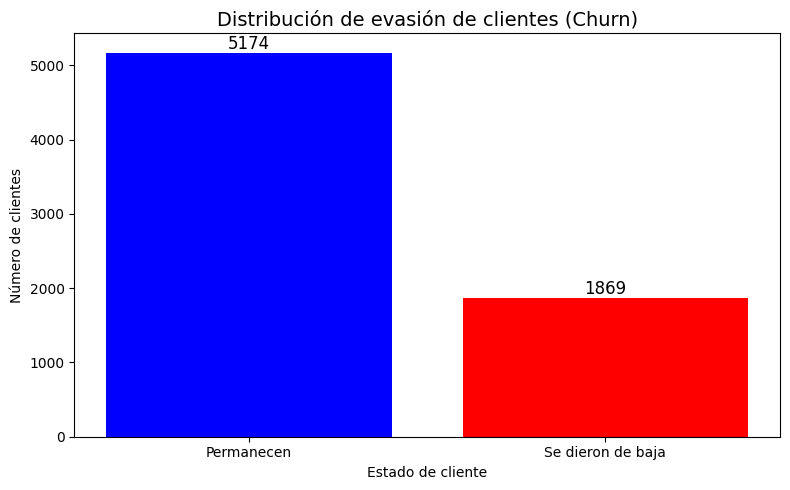

In [165]:
# Conteo de churn (0: se queda, 1: se va)
conteo_churn = df_normalizado['Churn'].value_counts().sort_index()

# Etiquetas personalizadas
etiquetas = ['Permanecen', 'Se dieron de baja']
colores = ['blue', 'red']  # Verde y rosado suave

# Gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(etiquetas, conteo_churn, color=colores)
plt.title('Distribución de evasión de clientes (Churn)', fontsize=14)
plt.ylabel('Número de clientes')
plt.xlabel('Estado de cliente')
for i, valor in enumerate(conteo_churn):
    plt.text(i, valor + 50, str(valor), ha='center', fontsize=12)
plt.tight_layout()
plt.show()

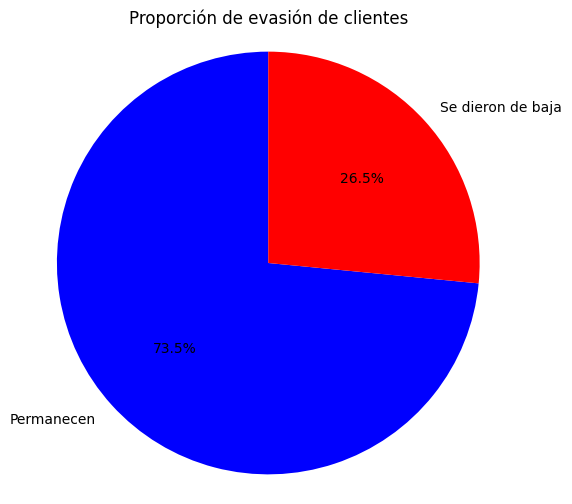

In [166]:
# Pie chart con proporciones
plt.figure(figsize=(6, 6))
plt.pie(conteo_churn, labels=etiquetas, autopct='%1.1f%%', startangle=90, colors=colores)
plt.title('Proporción de evasión de clientes')
plt.axis('equal')  # Mantiene la forma circular
plt.show()


#📄Informe final